# Predicting Employee Attrition in the Dawn of Recession(InClass Kaggle Competition)
## [Summer Analytics 2020 Capstone Project](https://www.kaggle.com/c/summeranalytics2020/)
This was an Inclass Competition held by the [Consulting and Analytics](https://www.facebook.com/caciitg) group of IIT Guwahati as the final assignment of their 6 week long Summer Analytics course. I secured a top 10 rank in this competition. This is my first Kaggle Competition

## Overview of Problem
As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

In [1]:
#Importing nescessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#setting display options to show all columns
pd.set_option('max_columns', None)

In [3]:
#importing data into pandas dataframe
df = pd.read_csv("train.csv", index_col = "Id")
df_t = pd.read_csv("test.csv", index_col = "Id")
y = df.Attrition
df.drop(['Attrition'], axis=1, inplace = True)

Let us look at the data

In [4]:
print('The shape of the data is:'+ str(df.shape))
df.head()

The shape of the data is:(1628, 27)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [5]:
df.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

* The data seems over all quite clean and there are no missing values.
* The data has a mix of numerical features and catagorical features. The categorical data is exclusively of nominal type as the ordinal categorical features have already been encoded.
We will encode the remaining features using OneHotEncoding using pandas get_dummies()

In [6]:
cat = df.select_dtypes(include=object).columns.tolist()
df_dummies = pd.get_dummies(df, columns=cat, prefix=cat, drop_first=True )
df_t_dummies = pd.get_dummies(df_t, columns=cat, prefix=cat, drop_first=True )

In [7]:
print('The shape of the data is:'+ str(df.shape))
df_dummies.head()

The shape of the data is:(1628, 27)


,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,2,3,571,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,36,12,4,1614,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
3,55,2,1,842,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,39,24,1,2014,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
5,37,3,3,689,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


## Rough Models
While it is good practise to do EDA before creating models let us just make a few rough models to get an estimate of how much work is needed in the future and that there are no glaring faults in the data. Since the data set is relatively small this won't take much time to run anyway.

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [9]:
import time, datetime

### KFold
It is good practise to use cross-validation while scoring models as it tells us which model is better without overfitting the data. Using K-fold cv ensures that almost all the data is used atleast once for both training and testing. The average score is then reported.

### Scoring Metric
The scoring metric used in this competition is **ROC_AUC**. This scoring metric checks the degree of seperability at all possible thresholds giving a better estimate in classification models. This system requires us to output probablities instead of classes. This is an important consideration for models like SVC which require you to specify probablity calculations before fitting"

In [10]:
def fit_ml_algo2(algo, X, y, cv):
    score_l = cross_val_score(algo, X, y, cv = 5, scoring = 'roc_auc')
    score_m = score_l.mean()
    algo.fit(X,y)
    return score_l, score_m

In [11]:
X = df_dummies

# SVC

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

Support Vector Machines are extremely sensitive to normalisation

In [13]:
#here the svm converged using the 'rbf' kernel
start_time = time.time()
svc = SVC()
score_l, score_m = fit_ml_algo2(svc, X_s, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.98043945 0.98123092 0.97422078 0.99230361 0.96470276]
CV mean score: 0.9785795047676478
Running Time: 0:00:00.589420


# Decision Tree

In [14]:
start_time = time.time()
dt = DecisionTreeClassifier(random_state=69)
score_l, score_m = fit_ml_algo2(dt, X, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.95857988 0.92307692 0.94378698 0.9375     0.94047619]
CV mean score: 0.9406839954916878
Running Time: 0:00:00.096740


# Random Forest

In [15]:
start_time = time.time()
rf = RandomForestClassifier(random_state=69)
score_l, score_m = fit_ml_algo2(rf, X, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [1. 1. 1. 1. 1.]
CV mean score: 1.0
Running Time: 0:00:01.448408


**100% accuracy without any tuning or feature engineering!!?<br>**
I should immediately apply to Google for the chief data scientist role. But my celebrations were premature as submitting to the Kaggle leaderboard gave me an abysmal score of 79%. Something was very wrong.<br> 
Whenever we get an overoptimistic score on the validation data it generally means there is something wrong with the data. This was a classic case of a [Data Leak](https://www.kaggle.com/alexisbcook/data-leakage).<br>
A data leak generally happens for 2 reasons:
    1. Target Leakage (Time Series Data)
    2. Train Test contamination
My first guess is Target Leakage. This happens when training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and even the validation data), but the model will perform poorly in production. Manually inspecting the columns and selecting is one way to solve this. Another way could be to examine the distribuition of test and training data to see if there are any major differences. This comes under EDA

# EDA

Checking balance of the positive and negative class

0    843
1    785
Name: Attrition, dtype: int64

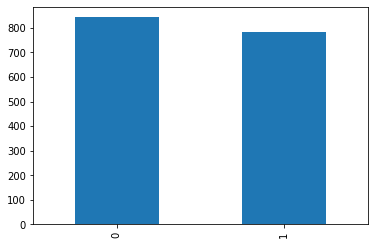

In [16]:
y.value_counts().plot.bar()
y.value_counts()

Well balanced dataset

Plotting a heatmap to see correlation between features

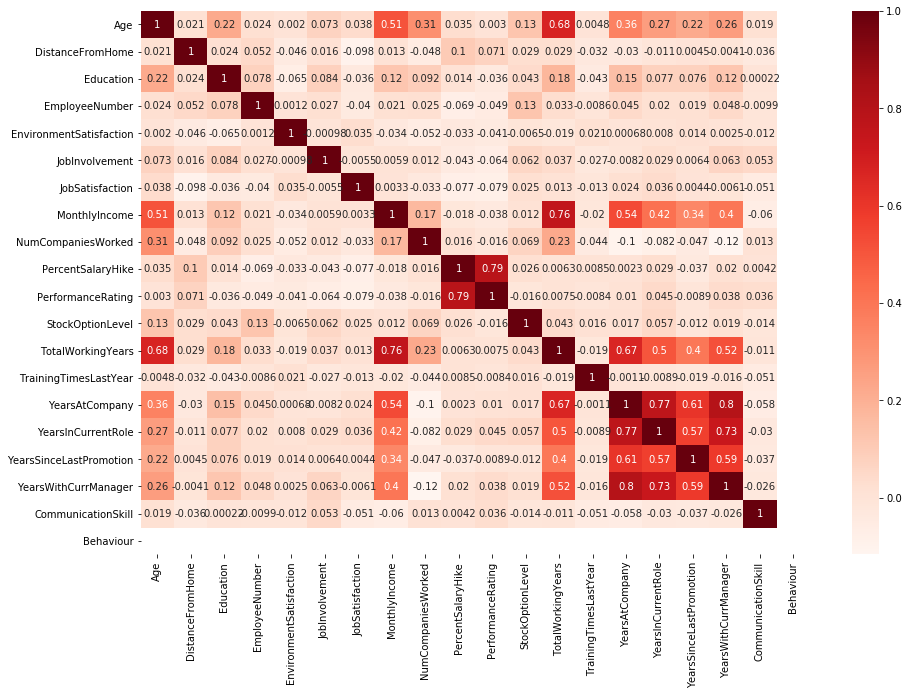

In [17]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see that 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' and 'TotalWorkingYears' are highly correlated. This is unsuprising as they are all basically about the same data. We could make a single feature from these features and remove the rest later.<br>
'MonthlyIncome' is also correlated to this group as well as 'Age'.

Let's visualize our categorical data. We also include subplots of the test data as well as difference based on Attrition.

In [18]:
df_cat = df[df.select_dtypes(object).columns]
df_t_cat = df_t[df.select_dtypes(object).columns]

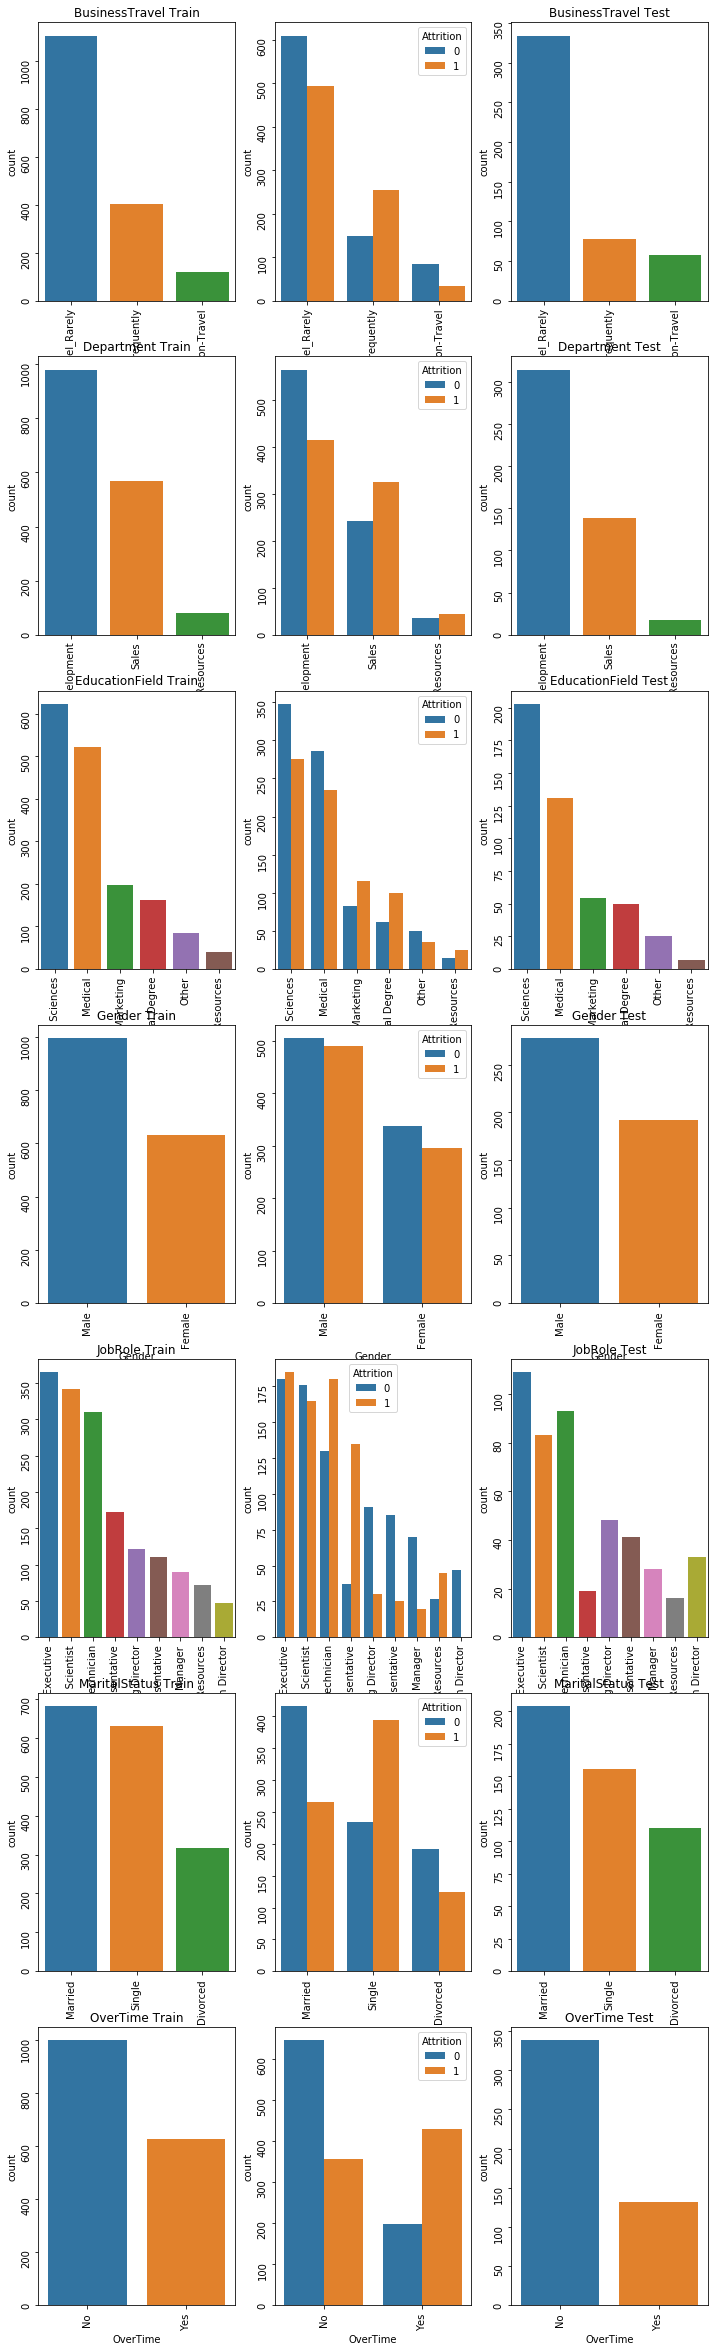

In [19]:
fig, ax = plt.subplots(7,3,figsize = (12,42))
for i in np.arange(7):
    s = df_cat.iloc[:,i]
    t = df_t_cat.iloc[:,i]
    sns.countplot(s, ax = ax[i,0], order = s.value_counts().index.tolist())
    ax[i,0].set_title(df_cat.columns[i]+' Train')
    ax[i,0].tick_params(labelrotation=90)
    sns.countplot(s, ax = ax[i,1], order = s.value_counts().index.tolist(), hue=y)
    ax[i,1].tick_params(labelrotation=90)
    sns.countplot(t, ax = ax[i,2], order = s.value_counts().index.tolist())
    ax[i,2].set_title(df_t_cat.columns[i]+' Test')
    ax[i,2].tick_params(labelrotation=90)

There seems to be no glaring difference in distribuition of Test and Train and the have a similar distribuition.<br>
Gender seems to have the least impact on Attrition while Overtime seems to have a significant. It will be interesting to see how these features are ranked using feature importance later.

Not all data is continuous. The discrete ones can be considered as ordinal categories.

In [20]:
ord_cat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'Behaviour', 'CommunicationSkill','StockOptionLevel']
df_num = df.select_dtypes(include = np.number)
df_t_num = df_t.select_dtypes(include = np.number)
df_num.drop(ord_cat, axis=1, inplace=True)
df_t_num.drop(ord_cat, axis=1, inplace=True)
df_ord = df[ord_cat].copy()
df_t_ord = df_t[ord_cat].copy()

C:\Users\Rishon Dsouza\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Lets plot the distribution plot for the ordinal data of both test and train. As well as seperate the positive class from the negative.

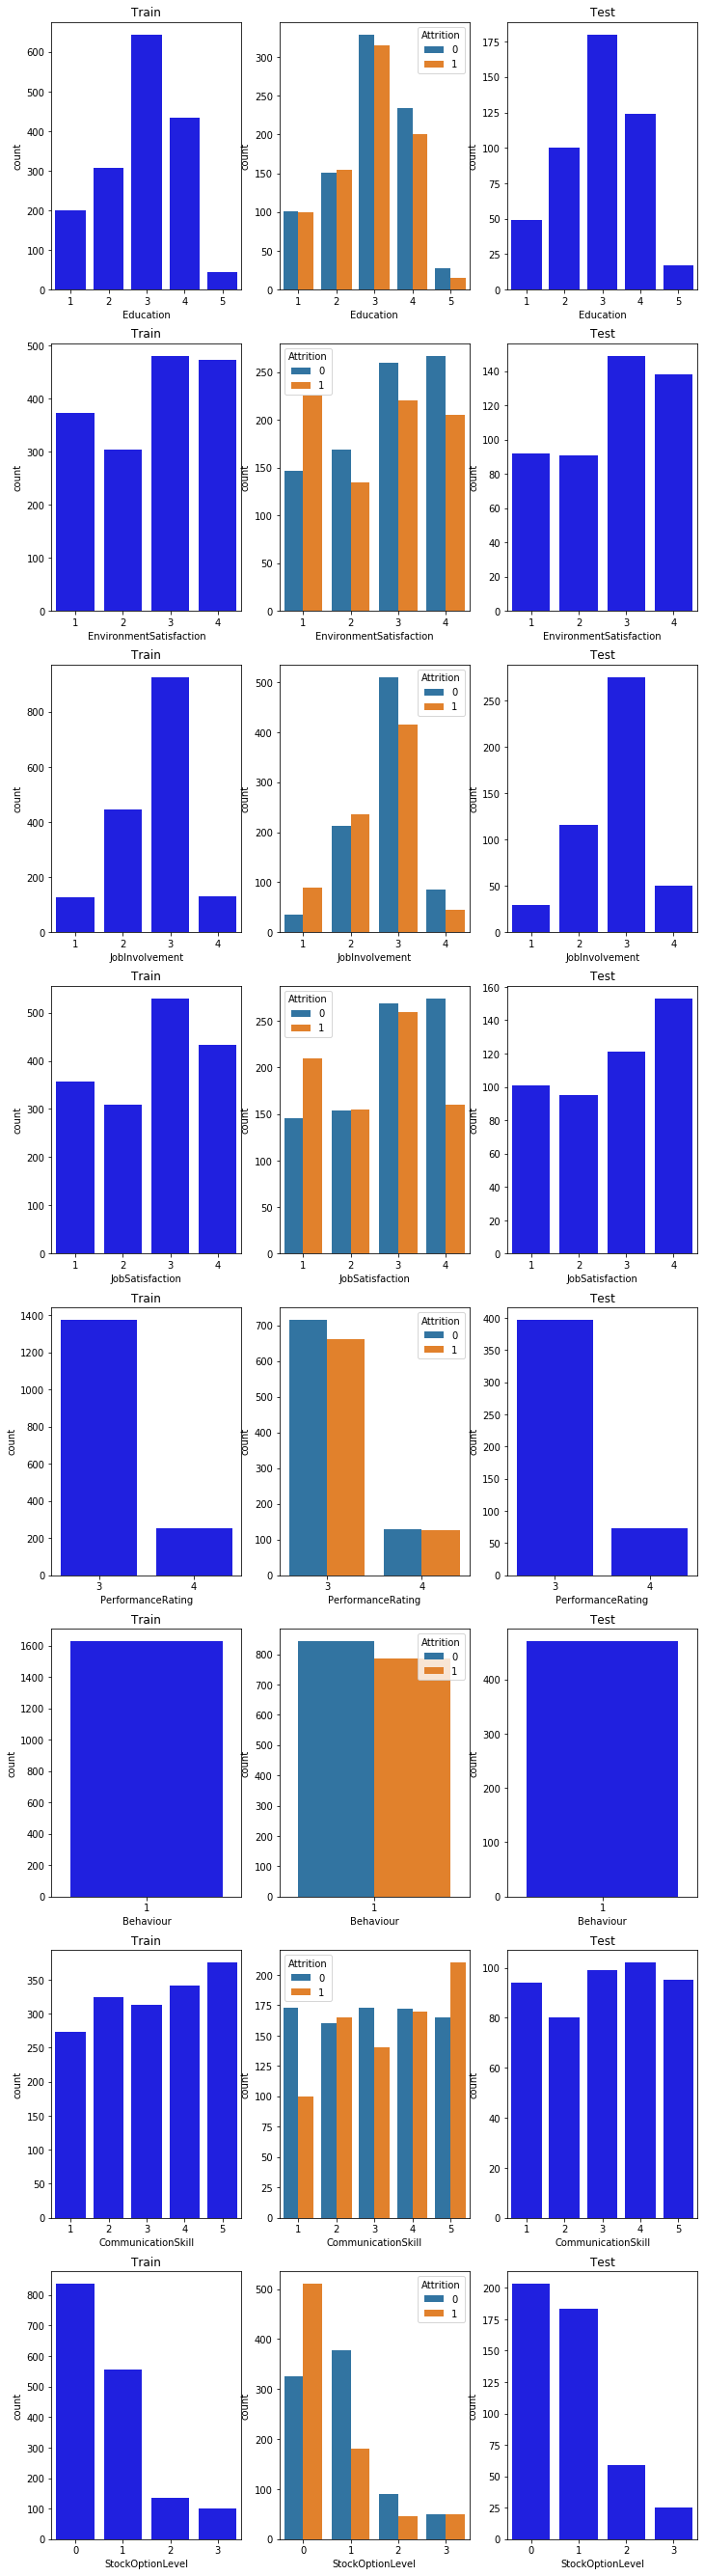

In [21]:
length = len(df_ord.columns)
fig, ax = plt.subplots(length,3,figsize = (2*6,6*length))
for i in np.arange(length):
    s = df_ord.iloc[:,i]
    t = df_t_ord.iloc[:,i]
    sns.countplot(s, color='b',ax = ax[i,0])
    ax[i,0].set_title('Train')
    sns.countplot(s, hue=y, ax = ax[i,1])
    #ax[i,1].set_title('Train')    
    sns.countplot(t, color='b', ax = ax[i,2])
    ax[i,2].set_title('Test')

Visually Train and Test are remarkably similar

Simarly plotting numerical features

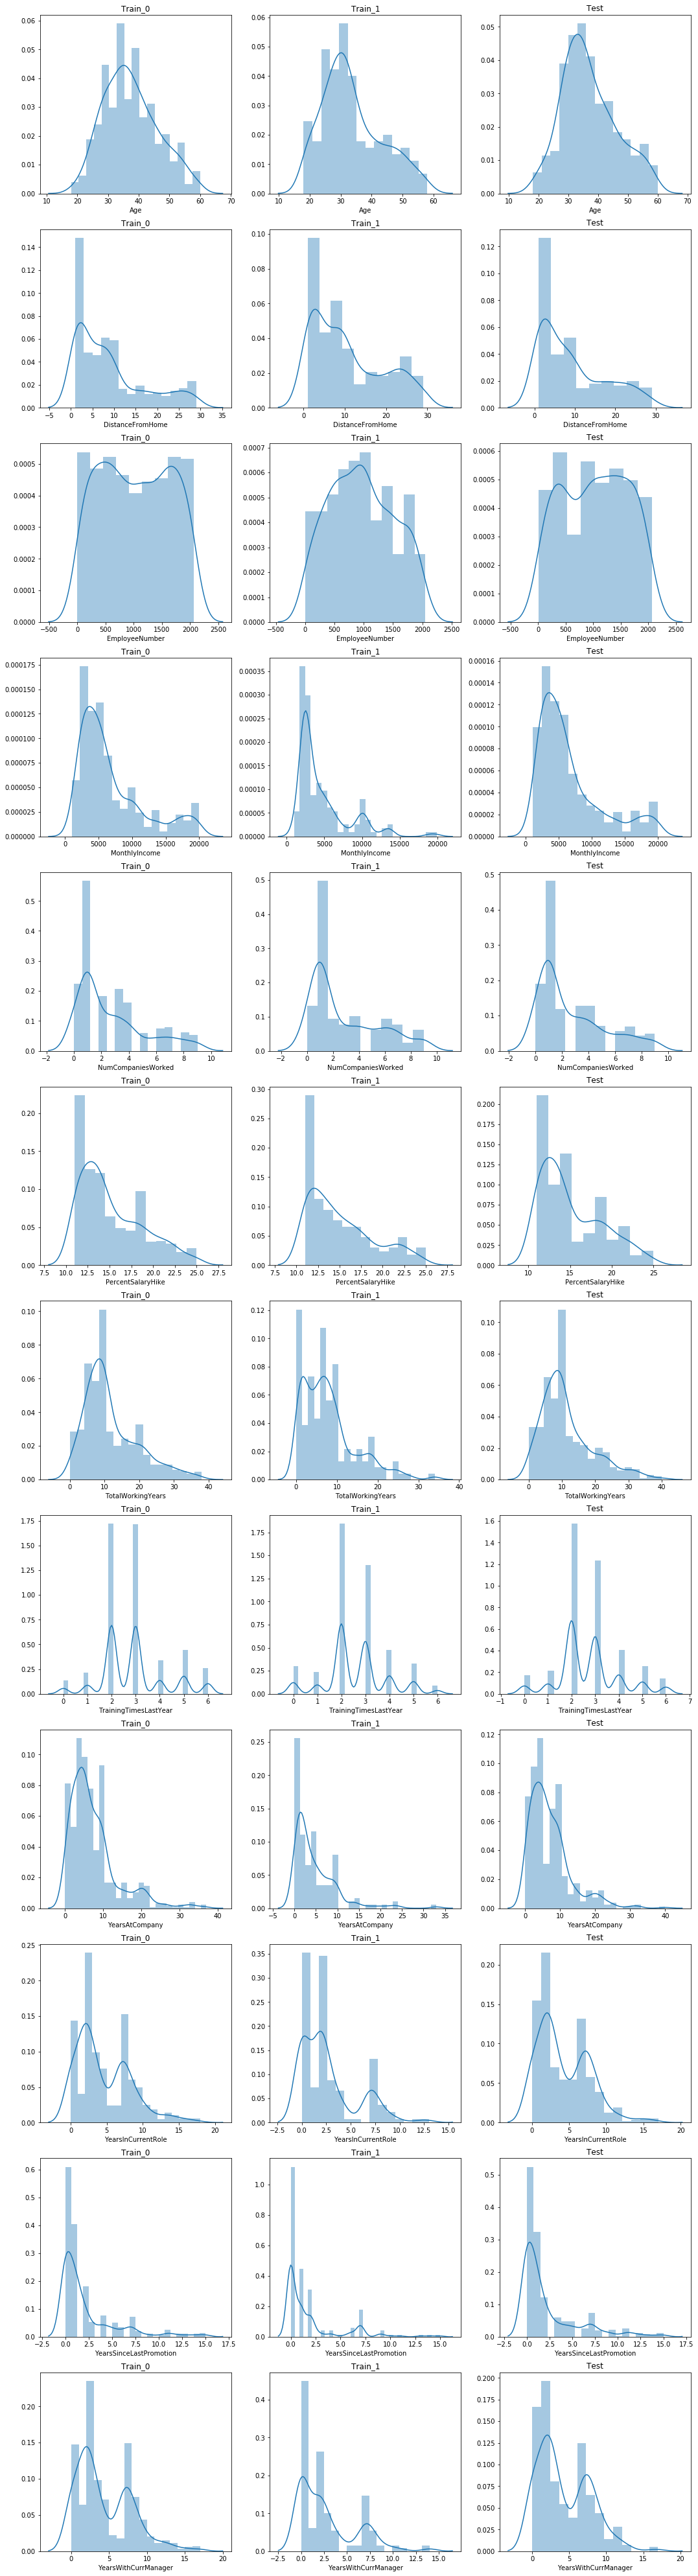

In [22]:
length = len(df_num.columns)
fig, ax = plt.subplots(length,3,figsize = (3*6,6*length))
for i in np.arange(length):
    s = df_num.iloc[:,i]
    t = df_t_num.iloc[:,i]
    sns.distplot(s[y==0], ax = ax[i,0])
    ax[i,0].set_title('Train_0')
    sns.distplot(s[y==1], ax = ax[i,1])
    ax[i,1].set_title('Train_1')
    sns.distplot(t, ax = ax[i,2])
    ax[i,2].set_title('Test')

Again the plot between test and train is similar.


We can see that attrition rate is relatively high in age <35 compared to >35.
Also attrition is lower in the higher 'MonthlyIncome' bracket. Considering to make an interaction feature between the two.

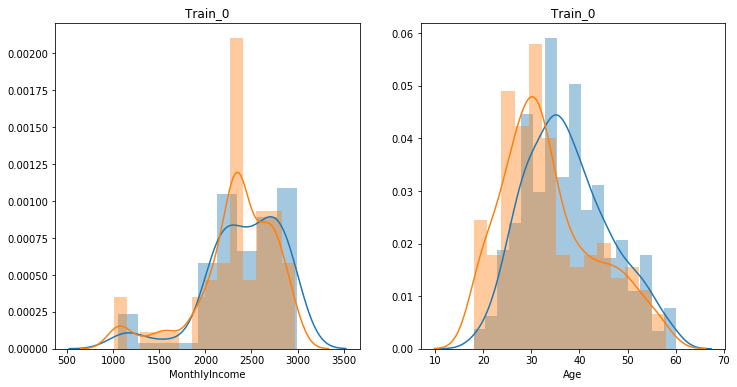

In [23]:
fig, ax = plt.subplots(1,2,figsize = (2*6,6))
sns.distplot(df.MonthlyIncome[(y==0)&(df.MonthlyIncome<3000)&(df.Age<35)], ax = ax[0])
ax[0].set_title('Train_0')
sns.distplot(df.MonthlyIncome[(y==1)&(df.MonthlyIncome<3000)&(df.Age<35)], ax = ax[0])
sns.distplot(df.Age[y==0], ax = ax[1])
ax[1].set_title('Train_0')
sns.distplot(df.Age[y==1], ax = ax[1])

## Conclusion about Data Leak
It does not seem to be a target leakage. Thus there must be a Train Valid split leak.<br>
There is contamination of validation data with some clues about training data which is assisting it in getting artificial high scores. Also we used K fold which relies on sampling uniformly all over the training dataset. Both these reasons indicate there could be dupicated values. Using pandas duplicated we can check this

In [24]:
df.duplicated().sum()

628

Filtering them out

In [27]:
df = pd.read_csv("train.csv", index_col = "Id")
df_t = pd.read_csv("test.csv", index_col = "Id")
df = df.loc[df.duplicated()==0,:]
y = df.Attrition
df.drop(['Attrition'], axis=1, inplace = True)
cat = df.select_dtypes(include=object).columns.tolist()
df_dummies = pd.get_dummies(df, columns=cat, prefix=cat, drop_first=True )
df_t_dummies = pd.get_dummies(df_t, columns=cat, prefix=cat, drop_first=True )

In [28]:
df_dummies.shape

(1000, 41)

628 datapoints were duplicated. Doing a test on a rough model will now give us a more realistic score

In [29]:
start_time = time.time()
rf2 = RandomForestClassifier(random_state=69)
score_l, score_m = fit_ml_algo2(rf2,df_dummies, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.80005726 0.71149074 0.80979195 0.87397693 0.84933036]
CV mean score: 0.8089294484077751
Running Time: 0:00:01.067446


# Adding New Features

In [30]:
def add_features(df_d):
    df_d['Sal_totyears'] = df_d['MonthlyIncome']/(df_d['TotalWorkingYears']+1)
    df_d['retire_60'] = df_d.Age>=60
    df_d['YearsperCompany'] = df_d.TotalWorkingYears/(df_d.NumCompaniesWorked+1)
    df_d['Sal_todist'] = df_d['MonthlyIncome']/(df_d['DistanceFromHome']+1)
    df_d['Sal_toEdu'] = df_d['MonthlyIncome']/df_d['Education']
    df_d['JSpay '] = df_d['JobSatisfaction']*df_d['MonthlyIncome']
    df_d['ESpay '] = df_d['EnvironmentSatisfaction']*df_d['MonthlyIncome']
    df_d['Satisfaction_mean'] = (df_d['EnvironmentSatisfaction']+df_d['JobSatisfaction'])/2
    df_d['Young_poor'] = ((df_d.Age<30) & (df_d.Age>20) & (df_d.MonthlyIncome<3000))
    df_d['Stability'] = df_d['YearsInCurrentRole']/(df_d['YearsAtCompany']+1)                                
    return df_d

In [31]:
df_new = add_features(df_dummies)
df_t_new = add_features(df_t_dummies)

# Selecting Model

In [32]:
X = df_new
X_t = df_t_new

# SVC

In [33]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [34]:
#here the svm converged using the 'rbf' kernel
start_time = time.time()
svc = SVC(probability = True)
score_l, score_m = fit_ml_algo2(svc, X_s, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.79881657 0.72494751 0.79996182 0.86811756 0.87220982]
CV mean score: 0.8128106565684108
Running Time: 0:00:00.833241


# NNet

In [35]:
start_time = time.time()
nn = MLPClassifier()
score_l, score_m = fit_ml_algo2(nn, X_s, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

C:\Users\Rishon Dsouza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rishon Dsouza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rishon Dsouza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rishon Dsouza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

CV scores: [0.79480817 0.72685627 0.8049246  0.81026786 0.86904762]
CV mean score: 0.8011809039802216
Running Time: 0:00:06.901077


C:\Users\Rishon Dsouza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ADA Boost

In [36]:
start_time = time.time()
ada= AdaBoostClassifier(random_state=69)
score_l, score_m = fit_ml_algo2(ada, X, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.82458484 0.70872304 0.86600496 0.83519345 0.81994048]
CV mean score: 0.8108893549068797
Running Time: 0:00:01.481431


# GradientBoostingClassifier

In [37]:
start_time = time.time()
gb = GradientBoostingClassifier(random_state=69)
score_l, score_m = fit_ml_algo2(gb, X, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.7617866  0.69517083 0.79404467 0.83686756 0.78478423]
CV mean score: 0.7745307770703243
Running Time: 0:00:02.026990


# XGBoost

XGBoost has lower scores but it works well with tuning

In [38]:
start_time = time.time()
xgb = XGBClassifier(random_state=69) #learning_rate=0.001
score_l, score_m = fit_ml_algo2(xgb, X, y, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.76923077 0.70318763 0.82363046 0.8249628  0.80896577]
CV mean score: 0.7859954871431298
Running Time: 0:00:00.763320


We'll choose XGboost inspite of its low score as generally with good tuning it is often the best model. The second one we choose is ADAboost

# Hyperparameter Tuning

We'll use GridSearch with cross validation to tune the models

## XGBoost

In [39]:
param = {
    'n_estimators':[200,500,1000],
    'learning_rate':[0.01,0.05,0.1],
    'min_child_weight': [1,5,7],
        
        'max_depth': [1,2, 5,7]
    
    
}
#fit_params = {'early_stopping_rounds':10} 
xgb2 = XGBClassifier(random_state=69)
xgb_grid = GridSearchCV(estimator=xgb2, param_grid=param, scoring='roc_auc', n_jobs=-1, cv=3, verbose=False)
start_time = time.time()
xgb_grid.fit(X,y)
times = (time.time() - start_time)
score_g = xgb_grid.best_score_
print("Running Time: %s"%datetime.timedelta(seconds=times))
print("CV mean score: %s"%score_g)

Running Time: 0:01:03.906386
CV mean score: 0.8325073558908246


In [40]:
xgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_weight': 5,
 'n_estimators': 500}

In [41]:
xgb = xgb_grid.best_estimator_

## ADAboost

In [42]:
param = {
    
      'n_estimators': [50,100, 200, 300],
    'learning_rate':[0.03,0.1,0.3,1.0,1,1.5,5,10]
}
ada= AdaBoostClassifier(random_state=69)
ada_grid = GridSearchCV(estimator=ada, param_grid=param, scoring='roc_auc', n_jobs=-1, cv=3, verbose=2)
start_time = time.time()
ada_grid.fit(X,y)
times = (time.time() - start_time)
score_g = ada_grid.best_score_
print("Running Time: %s"%datetime.timedelta(seconds=times))
print("CV mean score: %s"%score_g)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   42.1s finished


Running Time: 0:00:42.646761
CV mean score: 0.8224647786690357


In [43]:
ada_grid.best_params_

{'learning_rate': 0.3, 'n_estimators': 50}

In [44]:
ada = ada_grid.best_estimator_

XGboost is clearly better

In [45]:
def submission(model, num):
    y_t_pred = model.predict_proba(X_t)
    final = pd.DataFrame()
    final['Id'] = df_t.index.values
    
    final['Attrition'] = y_t_pred[:,1]
    final.to_csv('Submissions/Submission{}.csv'.format(num), index = False)
    return

In [46]:
submission(xgb,1)
pd.read_csv('Submissions/Submission1.csv').head()

,Id,Attrition
0,1,0.032241
1,2,0.031075
2,3,0.113945
3,4,0.066200
4,5,0.026557


However the score is not good enough. We do more EDA

0    843
1    157
Name: Attrition, dtype: int64

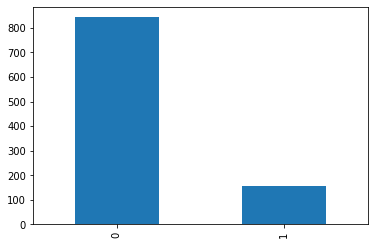

In [47]:
y.value_counts().plot.bar()
y.value_counts()

There is a clear imbalance between classes. This can create imbalanced models because it is incentivized to classify the negative class correctly. We need to rectify this

# Imbalanced Data

Synthetic Minority Oversampling Technique or SMOTE is a popular technique used to restore imbalance in data. It creates more records in the minority class using different techniques. There are many types of [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) but we will use the basic one which is using K-NearestNeighbours. SMOTE is implemented in the imbalanced-learn library.

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X,y)

In [50]:
X_sm.shape

(1686, 51)

Lets do a rough check on a model

# Random Forest

In [51]:
start_time = time.time()
rf = RandomForestClassifier(random_state=69)
score_l, score_m = fit_ml_algo2(rf, X_sm, y_sm, cv = 5)
times = (time.time() - start_time)
print("CV scores: %s"%score_l)
print("CV mean score: %s"%score_m)
print("Running Time: %s"%datetime.timedelta(seconds=times))

CV scores: [0.92178145 0.99237461 0.99508664 0.99841505 0.9978339 ]
CV mean score: 0.9810983300571374
Running Time: 0:00:03.718663


By now I am confident in my own inability to produce such good results, and know for a fact somethings wrong. We are one again faced with the Sirens of data science, Data Leakages.<br>
This is again a Train Validation leakage caused by highly coerrelated records generated by SMOTE.<br>
The solution to this problem is to use SMOTE after splitting in cross validation not before as we have done here. The implementation of this is challenging as we have to use KFolds manually which is solves the problem but then we cant use GridSearch easily. The other way is to create a Pipeline using imblearn which has SMOTE, KFolds and GridSearchCV.<br>
We will use KFolds manually as it is simpler and I am not very familiar with imblearn

In [52]:
kf = KFold(n_splits=5)
model = XGBClassifier(learning_rate=0.1,max_depth=1, min_child_weight= 5, n_estimators=500,random_state=69)
X_n = X.to_numpy()
y_n = y.to_numpy()
avg=0
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X_n[train_index]
    y_train = y_n[train_index]
    X_test = X_n[test_index]
    y_test = y_n[test_index]  
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict_proba(X_test)
    print(f'For fold {fold}:')
    print(roc_auc_score(y_test,y_pred[:,1]))
    avg = avg + roc_auc_score(y_test,y_pred[:,1])
print('The avg score is:',avg/5)

For fold 1:
0.8229166666666667
For fold 2:
0.7360183241076541
For fold 3:
0.8805803571428572
For fold 4:
0.8761142857142856
For fold 5:
0.8651964848283866
The avg score is: 0.8361652236919699


In [53]:
def submission(model, num):
    y_t_pred = model.predict_proba(X_t.to_numpy())
    final = pd.DataFrame()
    final['Id'] = df_t.index.values
    
    final['Attrition'] = y_t_pred[:,1]
    final.to_csv('Submissions/Submission{}.csv'.format(num), index = False)
    return

In [54]:
submission(model,2)
pd.read_csv('Submissions/Submission2.csv').head()

,Id,Attrition
0,1,0.029370
1,2,0.050387
2,3,0.211278
3,4,0.072939
4,5,0.023652


# Feature Importance

We'll use a random forest model to check the feature importances

In [55]:
def feature_importance_plotter(model, fnum):
    importances = model.feature_importances_   
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)
    indices = indices[::-1] 
    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(fnum), importances[indices][:fnum],
           color="r",  align="center")    
    labels = []
    cols = df_new.columns.tolist()
    for indice in indices[:fnum]:
        labels.append(cols[indice])
    plt.yticks(range(fnum), labels)
    plt.ylim([-1, fnum])
    plt.show()

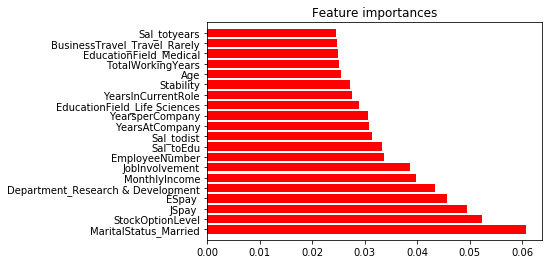

In [56]:
feature_importance_plotter(rf,20)

# Scope for improvement
1. Use a Pipeline so that we can GridSearch the best hyperparameters while using SMOTE and Kfold
2. Use some sort of feature selection to make more generalized models
3. Use polynomial features and select only the top interactions and add to this model
4. There are two types of attrition one is retirement and second is other reasons. We could seperately treat these two datas 
5. Created an esemble of best classifiers and use Voting to arrive at the optimal result